#### 필요 모듈 import

In [3]:
import pandas as pd
from datetime import datetime 

In [4]:

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~')

import seaborn as sns

#### 데이터 import 

In [5]:
unicorn = pd.read_csv("data/company_nps_data.csv", encoding="cp949")

In [6]:
unicorn.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


#### 간단히 살펴보기 
- 5000개 기업에 대한 데이터 
- 결측값은 없음 
- 월별 직원수, 연금보험료에서 -인 값은 없고, 연매출액의 경우 -값이 있음 
- 2015년 ~ 2019년 데이터인데 기업마다 데이터의 수가 다름. 평균적으로 14개 존재.

In [7]:
unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [8]:
unicorn.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


In [9]:
unicorn["회사ID"].value_counts().describe()

count    5000.000000
mean       19.960200
std        11.519512
min         1.000000
25%        12.000000
50%        14.000000
75%        26.000000
max        50.000000
Name: 회사ID, dtype: float64

#### 회사의 규모/성장을 어떻게 판단할 수 있을까?
- 연매출액과 연금보험료, 연금보험료와 직원수, 직원수와 연매출액은 모두 양의 상관관계를 보임
- 직원수와 연금보험료의 경우, 직원의 임금에 따라 연금보험료를 지불하기 때문에 특히 상관관계가 강함
- 두 컬럼 중에서는 '직원수'만 사용해도 될 것으로 판단 (직원수가 일차적 지표 )

<AxesSubplot:>

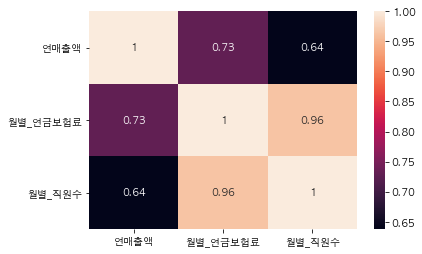

In [10]:
sns.heatmap(unicorn[['연매출액', '월별_연금보험료', '월별_직원수']].corr(), 
           annot=True)

In [11]:
unicorn[unicorn["연매출액"] >= 100000000]["회사ID"].unique()

array([231080, 130322, 232757, 127060, 130729, 231606, 419977, 510329,
       381180, 126606, 381344, 234236, 126831, 420082, 126664, 227414,
       128638, 420046, 129828, 127669, 126641,    102, 231703, 127511,
       126814, 420076, 294649, 440030, 128896, 403504, 403359, 294337,
       294530, 146654, 128539,     95, 294964, 126983,   2842, 297874,
       126521, 126772, 294620, 297327, 126516, 127090, 127180, 403351,
       128174, 127366, 419998, 294367, 130386, 231173, 127065, 154500,
       295805, 301484, 433492, 130577, 420008, 630190, 294790, 128440,
       403434, 403462, 126538, 403470, 426429, 227415, 130387,   8835,
       420237, 428817,  40860, 419945,     63, 295618, 126674, 469677,
       294387, 469458, 382850, 260890, 127202, 567650, 128485, 420092,
       231384,    597, 433756, 403522, 133951, 547586, 489849, 126802,
         5452, 430504, 296476, 420165, 580356, 439986, 439902])

#### 새로운 column 만들기 
- 1. 연/월 : 연도와 월을 합쳐서 연/월 컬럼을 구성
- 2. 연금보험료, 직원수 증가율

[참고] 

- 그런데 처리하고 나니 0이 있어서 증가율이 inf로 계산된 컬럼들이 발견됨 (주의!!)
- 보험료 증가율과 직원수 증가율은, (당연하지만) 우상향 하고 있음 

In [12]:
unicorn["월"] = unicorn["월"].apply(lambda x : str(x).zfill(2))

In [13]:
unicorn["년도"] = unicorn["년도"].astype(str)
unicorn["연월"] = unicorn["년도"] + "/" + unicorn["월"]

In [14]:
unicorn['연월'] = unicorn["연월"].apply(lambda x : datetime.strptime(x,'%Y/%m'))
unicorn['연월'] = unicorn['연월'].dt.to_period(freq = 'M') 

In [15]:
unicorn = unicorn.sort_values(by="연월")
unicorn["월별_보험료_증가율(%)"] = round(unicorn[["회사ID", "월별_연금보험료"]].groupby("회사ID").pct_change(), 4) * 100
unicorn["월별_직원수_증가율(%)"] = round(unicorn[["회사ID", "월별_직원수"]].groupby("회사ID").pct_change(), 4) * 100

<AxesSubplot:xlabel='월별_보험료_증가율(%)', ylabel='월별_직원수_증가율(%)'>

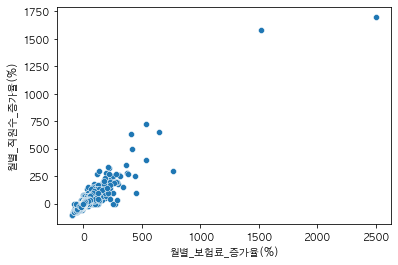

In [16]:
sns.scatterplot(data = unicorn,
                x = "월별_보험료_증가율(%)",
                y = "월별_직원수_증가율(%)")

#### 연매출액 확인 
- 2019년에도 데이터가 있는 회사가 많지 않음 (74개)
- 연매출액을 시각화했을 때, 2019년 데이터가 없더라도 매출은 낮지 않기 때문에 폐업했을 것이라는 추정은 불가 

In [17]:
revenue = unicorn[["회사ID", "연매출액", "년도"]]
revenue.drop_duplicates(inplace=True)

<ipython-input-17-b3d27cff738d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue.drop_duplicates(inplace=True)


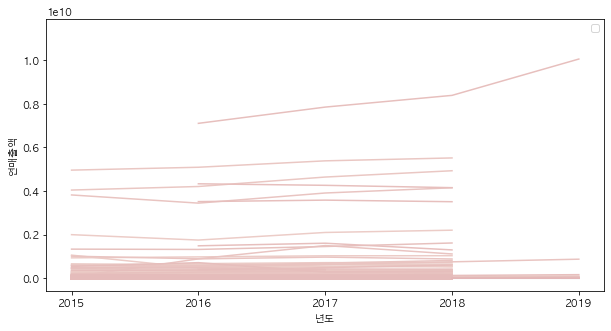

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=revenue, x="년도", y="연매출액", hue="회사ID")
plt.legend([])

In [19]:
temp = list(unicorn[unicorn["년도"] == "2019"]["회사ID"].unique())
print(f"2019년도에 데이터가 있는 회사의 수 : {len(temp)}개 \
\n리스트는 다음과 같음 : {temp}")

2019년도에 데이터가 있는 회사의 수 : 74개 
리스트는 다음과 같음 : [395238, 315996, 296819, 138077, 570867, 237625, 440911, 246826, 130261, 134575, 420165, 264486, 473265, 338722, 155754, 434171, 419945, 368448, 155829, 297542, 263195, 440884, 130023, 440559, 2037, 428380, 177377, 510449, 443698, 478922, 256445, 205415, 165163, 441424, 401386, 442525, 255015, 250472, 280967, 445499, 14271, 332916, 303882, 193239, 404192, 128174, 294367, 294028, 130756, 212335, 337323, 8208, 343863, 140370, 158004, 135668, 192812, 254479, 442376, 581504, 131998, 139442, 258745, 47306, 305146, 297682, 270460, 442467, 442798, 173916, 620445, 2693684, 3312354, 5159723]


#### 직원수 확인 
- 월별 직원수가 0명인 회사들이 11곳 존재함 
- 해당 회사들의 경우, 월별 직원수가 0~11명 사이로 제외해도 될 것으로 판단됨 

In [20]:
unicorn[unicorn["월별_직원수"] == 0]["회사ID"].unique()

array([288014, 478999, 291968, 277054, 217292, 439536, 157237, 472629,
       550603, 602137, 568445])

In [21]:
unicorn[unicorn["회사ID"].isin(list(unicorn[unicorn["월별_직원수"] == 0]["회사ID"].unique()))].sort_values(by="월별_직원수", ascending=False)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월,월별_보험료_증가율(%),월별_직원수_증가율(%)
42386,472629,1915700,2018,04,2402520,11,2018-04,0.00,0.00
49802,472629,1915700,2018,03,2402520,11,2018-03,45.05,57.14
92177,472629,1915700,2018,05,2402520,11,2018-05,0.00,0.00
67145,472629,1915700,2018,06,2384520,11,2018-06,-0.75,0.00
63712,472629,1915700,2018,07,2384520,11,2018-07,0.00,0.00
...,...,...,...,...,...,...,...,...,...
82809,217292,245945,2016,06,0,0,2016-06,-100.00,-100.00
69239,157237,27020003,2017,05,0,0,2017-05,-100.00,-100.00
7251,288014,3709457,2016,11,0,0,2016-11,NaN,NaN
64139,472629,1915700,2018,01,0,0,2018-01,-100.00,-100.00


In [22]:
data = unicorn.groupby("회사ID").mean().sort_values(by="월별_직원수_증가율(%)", ascending=False)
data.head(5)

,연매출액,월별_연금보험료,월별_직원수,월별_보험료_증가율(%),월별_직원수_증가율(%)
회사ID,,,,,
472629,1.516086e+06,1.177962e+06,6.416667,inf,inf
478999,3.609783e+05,3.619483e+05,2.916667,inf,inf
291968,4.395648e+06,6.844762e+05,2.884615,inf,inf
277054,9.547800e+04,2.452500e+05,2.000000,inf,inf
568445,7.402450e+05,4.725000e+05,1.500000,inf,inf


#### 매출 75% 이상, 직원수 75% 이상에 들어가는 기업은 몇 곳? (주관적 생각)

In [23]:
set1 = set(unicorn[unicorn["월별_직원수"] >= unicorn["월별_직원수"].describe()["75%"]]["회사ID"].unique())
set2 = set(unicorn[unicorn["연매출액"] >= unicorn["연매출액"].describe()["75%"]]["회사ID"].unique())
print("두 기준을 모두 충족하는 기업은 몇 군데?", len(set1 & set2))

두 기준을 모두 충족하는 기업은 몇 군데? 663


#### 매출 1000억 이상, 직원수 75% 이상에 들어가는 기업은 몇 곳? (주관적 생각)

In [24]:
set1 = set(unicorn[unicorn["월별_직원수"] >= unicorn["월별_직원수"].describe()["75%"]]["회사ID"].unique())
set2 = set(unicorn[unicorn["연매출액"] >= 100000000]["회사ID"].unique())
print("두 기준을 모두 충족하는 기업은 몇 군데?", len(set1 & set2))

두 기준을 모두 충족하는 기업은 몇 군데? 95


#여기까지 진행하고 든 생각 
- zscore 후 증감을 판단해야 했을까?

#### 매출 1000억 이상, 데이터 수 36개월 이상에 들어가는 기업은 몇 곳? (주관적 생각)

In [35]:
# set1 = set(unicorn[unicorn["월별_직원수"] >= unicorn["월별_직원수"].describe()["75%"]]["회사ID"].unique())
set2 = set(unicorn[unicorn["연매출액"] >= 24900000]["회사ID"].unique())
set3 = set(unicorn.groupby('회사ID').filter(lambda x: len(x)>=36)["회사ID"].unique())
print("기준 1 충족 : ", len(set2))
print("기준 2 충족 : ", len(set3))
print("두 기준을 모두 충족하는 기업은 몇 군데?", len(set2 & set3))


기준 1 충족 :  433
기준 2 충족 :  1127
두 기준을 모두 충족하는 기업은 몇 군데? 289


In [135]:
unicorn

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월,월별_보험료_증가율(%),월별_직원수_증가율(%)
9295,391439,2465042,2015,11,646460,4,2015-11,NaN,NaN
47772,381560,10314403,2015,11,34580380,105,2015-11,NaN,NaN
5572,305317,12271715,2015,11,5065780,18,2015-11,NaN,NaN
78461,301480,8353896,2015,11,5993500,27,2015-11,NaN,NaN
28216,242049,2586419,2015,11,2236500,14,2015-11,NaN,NaN
...,...,...,...,...,...,...,...,...,...
52438,258745,775720,2019,12,1049920,6,2019-12,0.00,0.00
69541,254479,2269625,2019,12,1260900,5,2019-12,-19.30,-28.57
40130,401386,1512330,2019,12,829060,3,2019-12,0.00,0.00
76502,131998,28298862,2019,12,17880120,66,2019-12,1.75,1.54


In [138]:
employee = unicorn[["회사ID", "년도", "월별_직원수", "연매출액"]].groupby(["회사ID", "년도"]).mean().reset_index()
employee["직원당_매출액"] = employee["연매출액"] / employee["월별_직원수"]

In [139]:
#체크 
employee[employee["회사ID"] == 442467]

,회사ID,년도,월별_직원수,연매출액,직원당_매출액
8824,442467,2015,27.500000,42615602.0,1.549658e+06
8825,442467,2016,30.000000,2965279.0,9.884263e+04
8826,442467,2017,31.750000,17728026.0,5.583630e+05
8827,442467,2018,35.916667,17003119.0,4.734047e+05
8828,442467,2019,36.750000,44059030.0,1.198885e+06


In [140]:
mask = employee["회사ID"].value_counts() >=3
over3year = list(mask[mask == True].index)
print("3개년 이상의 데이터가 있는 기업은 몇 개? ", len(over3year))

3개년 이상의 데이터가 있는 기업은 몇 개?  1645


In [142]:
#3개년 이상이 있는 경우만 필터링 
employee = employee[employee["회사ID"].isin(over3year)]
employee["연도별_평균_직원수_증가율"] = round(employee.groupby("회사ID")["월별_직원수"].pct_change() * 100, 2)
employee["연도별_평균_인당매출_증가율"] = round( employee.groupby("회사ID")["직원당_매출액"].pct_change() * 100, 2)
employee["연도별_평균_직원수_증가율"].fillna(0.0, inplace=True) #모든 회사의 첫 증가율은 nan이니까, 0%로 대체 
employee["연도별_평균_인당매출_증가율"].fillna(0.0, inplace=True)
employee.head(10)

,회사ID,년도,월별_직원수,연매출액,직원당_매출액,연도별_평균_직원수_증가율,연도별_평균_인당매출_증가율
52,14271,2015,13.000000,1199495.0,92268.846154,0.00,0.00
53,14271,2016,14.916667,4257715.0,285433.407821,14.74,209.35
54,14271,2017,16.750000,5005248.0,298820.776119,12.29,4.69
55,14271,2018,20.166667,8388401.0,415953.768595,20.40,39.20
56,14271,2019,22.416667,9039340.0,403241.933086,11.16,-3.06
222,59533,2015,5.000000,194704.0,38940.800000,0.00,0.00
223,59533,2016,5.916667,207762.0,35114.704225,18.33,-9.83
224,59533,2017,5.166667,124299.0,24057.870968,-12.68,-31.49
225,59533,2018,5.500000,144614.0,26293.454545,6.45,9.29
410,122968,2015,88.000000,37415377.0,425174.738636,0.00,0.00


In [145]:
employee.sort_values(by="연도별_평균_직원수_증가율"ㅡ )

,회사ID,년도,월별_직원수,연매출액,직원당_매출액,연도별_평균_직원수_증가율,연도별_평균_인당매출_증가율
1669,144717,2018,6.000000,2536683.0,4.227805e+05,-80.59,362.15
1738,146336,2018,6.166667,1670469.0,2.708869e+05,-78.86,24.04
1305,137889,2017,8.416667,19906061.0,2.365077e+06,-75.78,355.07
1455,140370,2016,10.500000,4984597.0,4.747235e+05,-74.07,1209.21
9699,490685,2018,16.833333,6592300.0,3.916218e+05,-69.90,369.04
...,...,...,...,...,...,...,...
4059,233340,2016,30.916667,1896121.0,6.133006e+04,341.67,255.68
7985,406593,2018,26.083333,806320.0,3.091323e+04,347.14,33.15
737,129633,2017,76.416667,16640671.0,2.177623e+05,436.26,-67.72
7729,394749,2018,116.916667,15643583.0,1.338011e+05,654.30,-81.17


In [150]:
# 특이한 케이스
employee[employee["회사ID"] == 470994]

,회사ID,년도,월별_직원수,연매출액,직원당_매출액,연도별_평균_직원수_증가율,연도별_평균_인당매출_증가율
9372,470994,2016,6.250000,729553.0,116728.480000,0.00,0.00
9373,470994,2017,84.833333,3733472.0,44009.493124,1257.33,-62.30
9374,470994,2018,86.666667,4082198.0,47102.284615,2.16,7.03


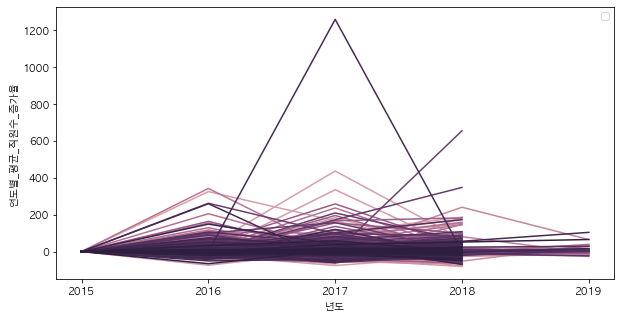

In [143]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=employee, x="년도", y="연도별_평균_직원수_증가율", hue="회사ID")
plt.legend([])

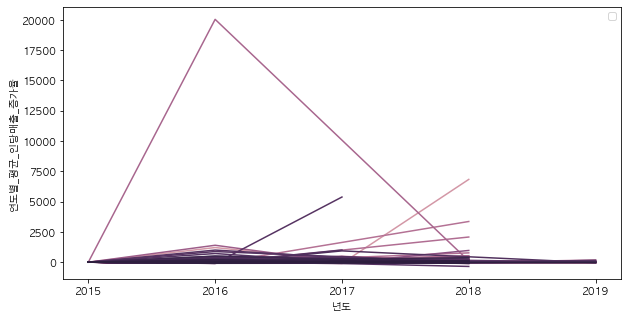

In [144]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=employee, x="년도", y="연도별_평균_인당매출_증가율", hue="회사ID")
plt.legend([])

In [154]:
#1. 연도별 평균 직원수가 항상 증가하는 기업
comlist1=[]
for i in list(employee["회사ID"].unique()):
    #print(i)
    dummy = list(employee[employee["회사ID"] == i]["연도별_평균_직원수_증가율"])
    dummy = [False for x in dummy if x < 0]
    #print(dummy)
    if all(dummy):
        comlist1.append(i)
len(comlist1)

375

In [155]:
#2. 연도별 인당 매출이 항상 증가하는 기업
comlist2=[]
for i in list(employee["회사ID"].unique()):
    #print(i)
    dummy = list(employee[employee["회사ID"] == i]["연도별_평균_인당매출_증가율"])
    dummy = [False for x in dummy if x < 0]
    #print(dummy)
    if all(dummy):
        comlist2.append(i)
len(comlist2)

375

In [157]:
#매해 성장한 경우
employee[employee["회사ID"] == 232321]

,회사ID,년도,월별_직원수,연매출액,직원당_매출액,연도별_평균_직원수_증가율,연도별_평균_인당매출_증가율
4010,232321,2015,33.000000,13040351.0,395162.151515,0.00,0.00
4011,232321,2016,47.916667,14101229.0,294286.518261,45.20,-25.53
4012,232321,2017,50.000000,20838325.0,416766.500000,4.35,41.62


In [158]:
#성장하지 못한 해가 있는 경우
employee[employee["회사ID"] == 232399]

,회사ID,년도,월별_직원수,연매출액,직원당_매출액,연도별_평균_직원수_증가율,연도별_평균_인당매출_증가율
4017,232399,2015,49.500000,75629729.0,1.527873e+06,0.00,0.00
4018,232399,2016,46.500000,80599258.0,1.733317e+06,-6.06,13.45
4019,232399,2017,38.416667,58169591.0,1.514176e+06,-17.38,-12.64
4020,232399,2018,50.916667,57172464.0,1.122863e+06,32.54,-25.84


In [160]:
set1 = set(comlist1)
set2 = set(comlist2)
set3 = set(unicorn[unicorn["연매출액"] >= 24900000]["회사ID"].unique())
set4 = set(unicorn.groupby('회사ID').filter(lambda x: len(x)>=36)["회사ID"].unique())
print("기준 1 - 연도별 평균 직원수 증가율이 항상 0이상 - 충족 : ", len(set1))
print("기준 2 - 연도별 평균 인당매출 증가율이 항상 0이상 - 충족 : ", len(set2))
print("기준 3 - 연매출액 249억이상 - 충족 : ", len(set3))
print("기준 4 - 데이터수 36개 이상 - 충족 : ", len(set4))

print("세 기준을 모두 충족하는 기업은 몇 군데?", len(set1 & set2 & set3 & set4))



기준 1 - 연도별 평균 직원수 증가율이 항상 0이상 - 충족 :  375
기준 2 - 연도별 평균 인당매출 증가율이 항상 0이상 - 충족 :  375
기준 3 - 연매출액 249억이상 - 충족 :  433
기준 4 - 데이터수 36개 이상 - 충족 :  1127
세 기준을 모두 충족하는 기업은 몇 군데? 71


In [134]:
employee

,회사ID,년도,월별_직원수,연도별_평균_직원수_증가율
52,14271,2015,13.000000,0.000000
53,14271,2016,14.916667,0.147436
54,14271,2017,16.750000,0.122905
55,14271,2018,20.166667,0.203980
56,14271,2019,22.416667,0.111570
...,...,...,...,...
9884,515264,2017,5.000000,-0.016393
9885,515264,2018,5.000000,0.000000
9895,516653,2016,4.166667,0.000000
9896,516653,2017,4.750000,0.140000
